# SGD 随机梯度下降
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

## Linear


In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.4841,  0.0842,  0.2475,  0.5776,  0.0385,  0.9217,  0.1798,  0.6159,  0.7182,  0.8436,
        0.0688,  0.7568,  0.4136,  0.842 ,  0.2816,  0.1374,  0.4325,  0.6026,  0.6128,  0.7094,
        0.9059,  0.1765,  0.3313,  0.8544,  0.4089,  0.1748,  0.2679,  0.3268,  0.8792,  0.3778])

In [6]:
y

array([  9.4522,   8.2525,   8.7424,   9.7327,   8.1155,  10.765 ,   8.5393,   9.8477,  10.1547,
        10.5308,   8.2065,  10.2703,   9.2409,  10.526 ,   8.8449,   8.4121,   9.2976,   9.8079,
         9.8384,  10.1281,  10.7177,   8.5296,   8.994 ,  10.5632,   9.2268,   8.5245,   8.8037,
         8.9803,  10.6376,   9.1333])

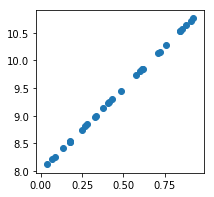

In [7]:
plt.scatter(x,y)

In [1]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [18]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.9717

In [13]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [14]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [19]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

## Pimsleur 




In [ ]:
def half_life(delta): return 2 ** delta
y = 